In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
train = pd.read_csv("../input/nyc-taxi-trip-duration/train.zip")
test = pd.read_csv("../input/nyc-taxi-trip-duration/test.zip")

In [3]:
train.shape

(1458644, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
print(len(train.id.unique()))
print(len(train.vendor_id.unique()))

1458644
2


In [8]:
train.vendor_id.unique()

array([2, 1])

In [9]:
train.passenger_count.unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

In [10]:
train = train[(train.passenger_count > 0)]
train = train[(train.passenger_count <7 )]

In [11]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

data = [train]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.day_name()
    i['Hour'] = i['pickup_datetime'].dt.hour

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458579 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458579 non-null  object        
 1   vendor_id           1458579 non-null  int64         
 2   pickup_datetime     1458579 non-null  datetime64[ns]
 3   dropoff_datetime    1458579 non-null  object        
 4   passenger_count     1458579 non-null  int64         
 5   pickup_longitude    1458579 non-null  float64       
 6   pickup_latitude     1458579 non-null  float64       
 7   dropoff_longitude   1458579 non-null  float64       
 8   dropoff_latitude    1458579 non-null  float64       
 9   store_and_fwd_flag  1458579 non-null  object        
 10  trip_duration       1458579 non-null  int64         
 11  Year                1458579 non-null  int64         
 12  Month               1458579 non-null  int64         
 13  Date        

In [13]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Year,Month,Date,Day of Week,Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,Sunday,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,Tuesday,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,Saturday,13


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


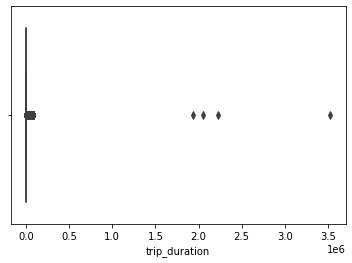

In [14]:
import seaborn as sns

ax = sns.boxplot(train["trip_duration"])

In [15]:
train.trip_duration.describe()

count    1.458579e+06
mean     9.594638e+02
std      5.237073e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [16]:
len(train[(train.trip_duration > 100000)])

4

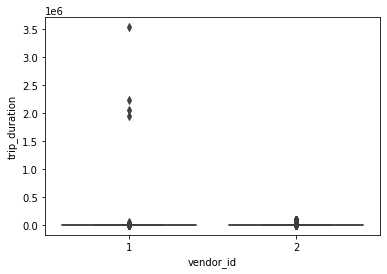

In [17]:
ax = sns.boxplot(x=train["vendor_id"],y=train["trip_duration"])

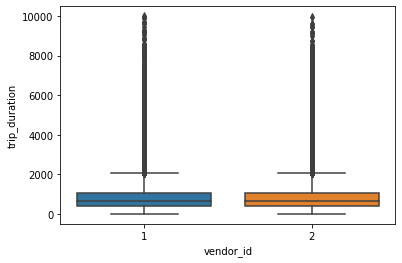

In [18]:
train_box = train[(train.trip_duration < 10000)]

ax = sns.boxplot(x=train["vendor_id"],y=train_box["trip_duration"])

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

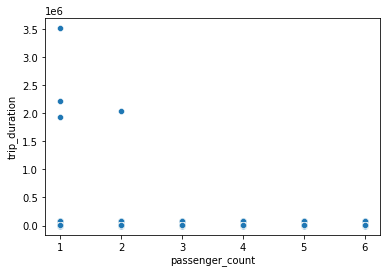

In [19]:
sns.scatterplot(x=train['passenger_count'], y=train['trip_duration'])

In [20]:
train[['passenger_count','trip_duration']].groupby('passenger_count').describe()

trip_duration                                               \
                        count         mean          std  min    25%    50%   
passenger_count                                                              
1                   1033540.0   930.399753  5386.716170  1.0  391.0  654.0   
2                    210318.0  1005.458335  5496.549848  1.0  416.0  689.0   
3                     59896.0  1028.236276  3718.677364  2.0  418.0  688.0   
4                     28404.0  1053.529749  3789.656142  2.0  423.0  698.0   
5                     78088.0  1070.232174  4379.508301  2.0  401.0  670.0   
6                     48333.0  1061.355223  4370.262838  2.0  398.0  662.0   

                                     
                     75%        max  
passenger_count                      
1                1062.00  3526282.0  
2                1122.00  2049578.0  
3                1111.00    86365.0  
4                1135.25    86379.0  
5                1088.00    86378.0  
6                1075.00    86377.0

<AxesSubplot:xlabel='Hour', ylabel='trip_duration'>

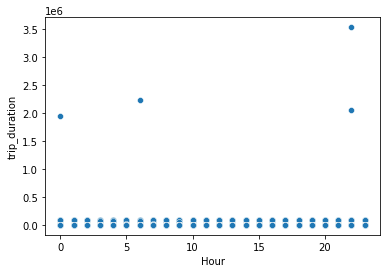

In [21]:
sns.scatterplot(x=train['Hour'], y=train['trip_duration'])

In [22]:
print(train[['Hour','trip_duration']].groupby('Hour').describe())
print()
print(train[['Hour','trip_duration']].groupby('Hour').mean().max())

     trip_duration                                                         \
             count         mean           std  min    25%    50%      75%   
Hour                                                                        
0          53243.0   936.742088   8999.505576  1.0  389.0  646.0  1039.00   
1          38562.0   903.287641   3733.983180  2.0  371.0  614.0   977.00   
2          27970.0   890.100000   4003.979387  1.0  354.0  591.0   941.75   
3          20894.0   890.110223   3961.094193  2.0  350.0  592.0   954.75   
4          15790.0   922.092464   3976.738501  1.0  340.0  611.0  1027.00   
5          14997.0   822.568580   2953.263904  1.0  287.0  518.0  1000.00   
6          33247.0   797.458267  12413.323515  2.0  290.5  473.0   802.50   
7          55600.0   831.758345   2522.785416  2.0  355.0  575.0   917.00   
8          67051.0   924.530059   2812.670523  2.0  394.0  660.0  1069.00   
9          67662.0   933.542668   2795.123200  1.0  405.0  680.5  1100.00   

<AxesSubplot:xlabel='Day of Week', ylabel='trip_duration'>

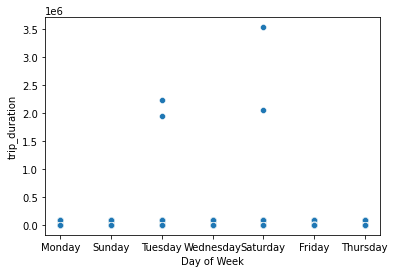

In [23]:
sns.scatterplot(x=train['Day of Week'], y=train['trip_duration'])

In [24]:
train[['Day of Week','trip_duration']].groupby('Day of Week').describe()

trip_duration                                               \
                    count         mean          std  min    25%    50%   
Day of Week                                                              
Friday           223521.0   990.252495  3275.055324  1.0  410.0  686.0   
Monday           187408.0   897.505790  2762.521721  1.0  380.0  630.0   
Saturday         220855.0   948.094854  9361.479618  1.0  386.0  637.0   
Sunday           195352.0   901.702168  3456.209790  1.0  364.0  602.0   
Thursday         218566.0  1006.564630  3100.434686  1.0  420.0  709.0   
Tuesday          202745.0   983.482266  7235.077679  1.0  407.0  679.0   
Wednesday        210132.0   975.453986  2903.831660  1.0  416.0  694.0   

                                
                75%        max  
Day of Week                     
Friday       1112.0    86390.0  
Monday       1027.0    86392.0  
Saturday     1012.0  3526282.0  
Sunday        978.0    86369.0  
Thursday     1155.0    86387.0  
Tuesday      1102.0  2227612.0  
Wednesday    1133.0    86366.0

In [25]:
train[['Month','trip_duration']].groupby('Month').describe()

trip_duration                                                       \
              count         mean          std  min    25%    50%     75%   
Month                                                                      
1          229692.0   922.391002  6906.958527  1.0  383.0  630.0  1013.0   
2          238288.0   920.867140  8894.746187  1.0  384.0  636.0  1022.0   
3          256179.0   937.392702  3213.271536  1.0  393.0  653.0  1052.5   
4          251636.0   962.919562  3158.825942  1.0  403.0  675.0  1097.0   
5          248474.0   999.497960  3186.851820  1.0  408.0  689.0  1133.0   
6          234310.0  1013.023716  3274.881704  1.0  414.0  695.0  1141.0   

                  
             max  
Month             
1      2227612.0  
2      3526282.0  
3        86366.0  
4        86364.0  
5        86391.0  
6        86387.0

In [26]:
train['store_and_fwd_flag'].value_counts()

N    1450537
Y       8042
Name: store_and_fwd_flag, dtype: int64

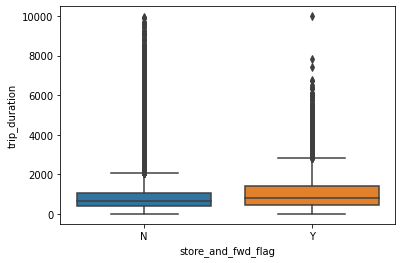

In [27]:
ax = sns.boxplot(x=train["store_and_fwd_flag"],y=train_box["trip_duration"])

In [28]:
train[['store_and_fwd_flag','trip_duration']].groupby('store_and_fwd_flag').describe()

trip_duration                                               \
                           count         mean          std  min    25%    50%   
store_and_fwd_flag                                                              
N                      1450537.0   958.789165  5251.109966  1.0  397.0  662.0   
Y                         8042.0  1081.156304   925.594100  2.0  456.0  813.0   

                                        
                        75%        max  
store_and_fwd_flag                      
N                   1074.00  3526282.0  
Y                   1400.75     9984.0

<AxesSubplot:>

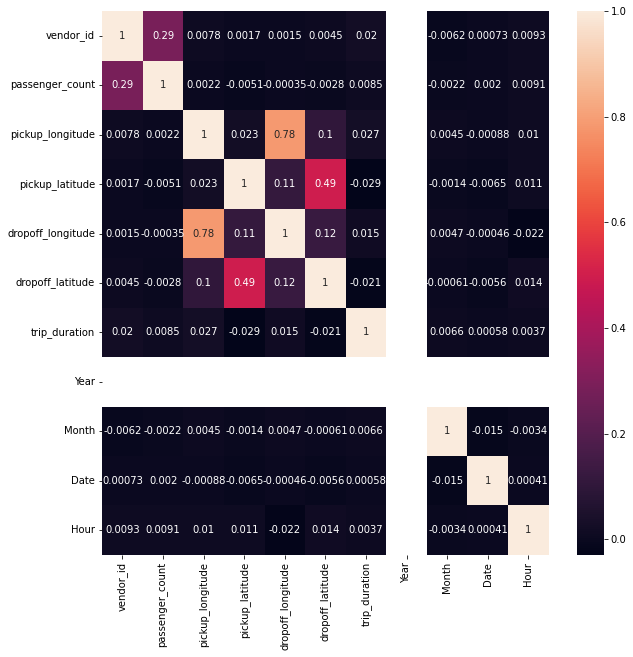

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cbar=True,annot=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458579 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458579 non-null  object        
 1   vendor_id           1458579 non-null  int64         
 2   pickup_datetime     1458579 non-null  datetime64[ns]
 3   dropoff_datetime    1458579 non-null  object        
 4   passenger_count     1458579 non-null  int64         
 5   pickup_longitude    1458579 non-null  float64       
 6   pickup_latitude     1458579 non-null  float64       
 7   dropoff_longitude   1458579 non-null  float64       
 8   dropoff_latitude    1458579 non-null  float64       
 9   store_and_fwd_flag  1458579 non-null  object        
 10  trip_duration       1458579 non-null  int64         
 11  Year                1458579 non-null  int64         
 12  Month               1458579 non-null  int64         
 13  Date        

<AxesSubplot:xlabel='pickup_longitude', ylabel='trip_duration'>

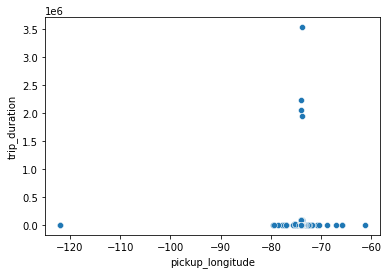

In [31]:
sns.scatterplot(x=train['pickup_longitude'],y=train['trip_duration'])

In [32]:
data = [train]
for i in data:
    i['diff_lat'] = abs(i['pickup_latitude'] - i['dropoff_latitude'])
    i['diff_long'] = abs(i['pickup_longitude'] - i['dropoff_longitude'])

In [33]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Year,Month,Date,Day of Week,Hour,diff_lat,diff_long
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,Monday,17,0.002335,0.017525
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,Sunday,0,0.007412,0.019066
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,Tuesday,11,0.053852,0.026306
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,Wednesday,19,0.013252,0.002228
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,Saturday,13,0.010689,0.000130


In [34]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Year,Month,Date,Day of Week,Hour,diff_lat,diff_long
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,Monday,17,0.002335,0.017525
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,Sunday,0,0.007412,0.019066
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,Tuesday,11,0.053852,0.026306
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,Wednesday,19,0.013252,0.002228
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,Saturday,13,0.010689,0.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016,4,8,Friday,13,0.005352,0.012711
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016,1,10,Sunday,7,0.049168,0.030762
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016,4,22,Friday,6,0.061428,0.045303
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,2016,1,5,Tuesday,15,0.008045,0.007446


<AxesSubplot:xlabel='diff_lat', ylabel='trip_duration'>

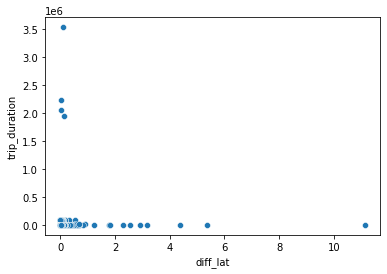

In [35]:
sns.scatterplot(x=train['diff_lat'] , y= train['trip_duration'])

<AxesSubplot:xlabel='diff_long', ylabel='trip_duration'>

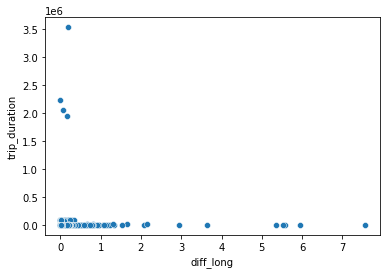

In [36]:
sns.scatterplot(x=train['diff_long'] , y= train['trip_duration'])

In [37]:
pd1 =  train[['Day of Week','trip_duration']].groupby('Day of Week').mean()

pd1


,trip_duration
Day of Week,
Friday,990.252495
Monday,897.505790
Saturday,948.094854
Sunday,901.702168
Thursday,1006.564630
Tuesday,983.482266
Wednesday,975.453986


In [38]:
max_day = pd1['trip_duration'].max()

pd1.index[pd1['trip_duration']==max_day].tolist()

print("highest trafic")

highest trafic
